<a href="https://colab.research.google.com/github/JavZon/Unsupervised-Learning/blob/main/Customer_segmentation_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**df**

In [2]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/customer_segmentation.csv"
df = pd.read_csv(url)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [4]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [5]:
df.isnull().sum()

,0
Customer Id,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
Address,0
DebtIncomeRatio,0


As **adress** and **customerid** columns have no important role in this case we drop these columns

In [6]:
df.drop(columns=["Address"],inplace=True)

In [8]:
df.drop(columns=["Customer Id"],inplace=True)

In [9]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


Working with **NaN** values

In [13]:
df[df['Defaulted'].isna()]

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
5,40,1,23,81,0.998,7.831,NaN,10.9
8,26,1,5,18,0.575,2.215,NaN,15.5
11,34,2,9,40,0.374,0.266,NaN,1.6
13,46,1,6,30,1.415,3.865,NaN,17.6
15,24,1,1,16,0.185,1.287,NaN,9.2
...,...,...,...,...,...,...,...,...
818,35,2,0,35,2.383,1.957,NaN,12.4
820,37,1,4,24,0.419,2.989,NaN,14.2
825,32,2,12,116,4.027,2.585,NaN,5.7
835,21,3,0,41,2.367,5.628,NaN,19.5


Since we simply can not give them mean values, we fill NaN values with 0

In [14]:
df['Defaulted'].fillna(0,inplace=True)

In [15]:
df.isnull().sum()

,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,0
DebtIncomeRatio,0


Scaling

In [18]:
scaler=StandardScaler()

In [21]:
X=df.values
X_scaled=scaler.fit_transform(X)

In [22]:
X_scaled

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

ML

In [23]:
k_means=KMeans(n_clusters=3, random_state=42, n_init="auto", init="k-means++")
k_means.fit(X_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [24]:
k_means.labels_

array([0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2,
       2, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0,

In [25]:
k_means.cluster_centers_

array([[-1.49558091e-01, -1.14064018e-01, -1.34481828e-01,
        -2.72413651e-01, -3.35659257e-01, -3.69866734e-01,
        -5.23796543e-01, -3.24345859e-01],
       [-3.90439547e-01,  1.62695612e-01, -6.79376729e-01,
        -3.86448408e-01, -6.83901553e-05, -6.93056978e-02,
         1.87982575e+00,  5.69270845e-01],
       [ 1.00292949e+00,  2.37745062e-01,  1.27767064e+00,
         1.45504409e+00,  1.24780477e+00,  1.45422700e+00,
        -2.04998195e-01,  5.53954880e-01]])

In [26]:
df['cluster']=k_means.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,2
2,33,2,10,57,6.111,5.802,1.0,20.9,1
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,2


In [29]:
df['cluster'].value_counts()

,count
cluster,
0,539
1,166
2,145


In [31]:
df.groupby('cluster').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,
0,33.827458,1.604824,7.654917,36.181818,0.863681,1.822410,0.000000,7.993506
1,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578
2,43.089655,1.931034,17.220690,102.724138,4.227897,8.018490,0.131034,13.891724


In [32]:
df2=df.groupby('cluster').mean().copy()

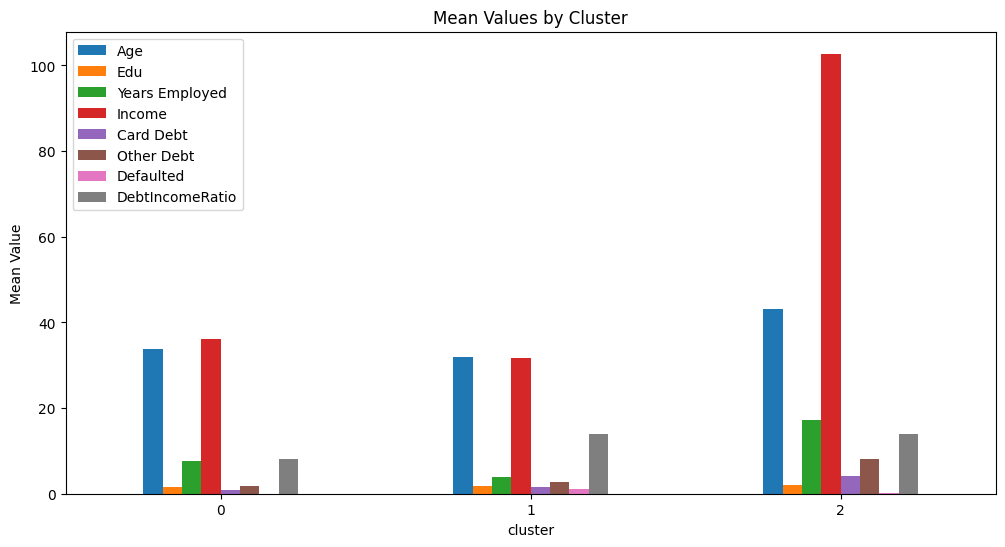

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `cluster_means` is your DataFrame containing the means of each cluster.
features = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']

df2.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Values by Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.show()


<Figure size 1200x600 with 0 Axes>

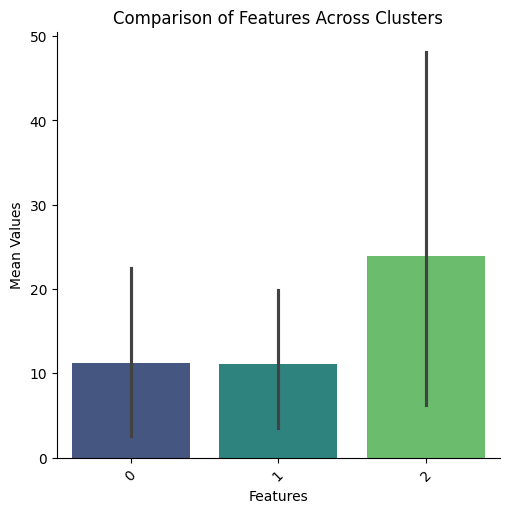

In [44]:
plt.figure(figsize=(12,6))
sns.catplot(data=df2.T,kind='bar', palette='viridis')
plt.xlabel('Features')
plt.title('Comparison of Features Across Clusters')
plt.ylabel('Mean Values')
plt.xticks(rotation=45)
plt.show()

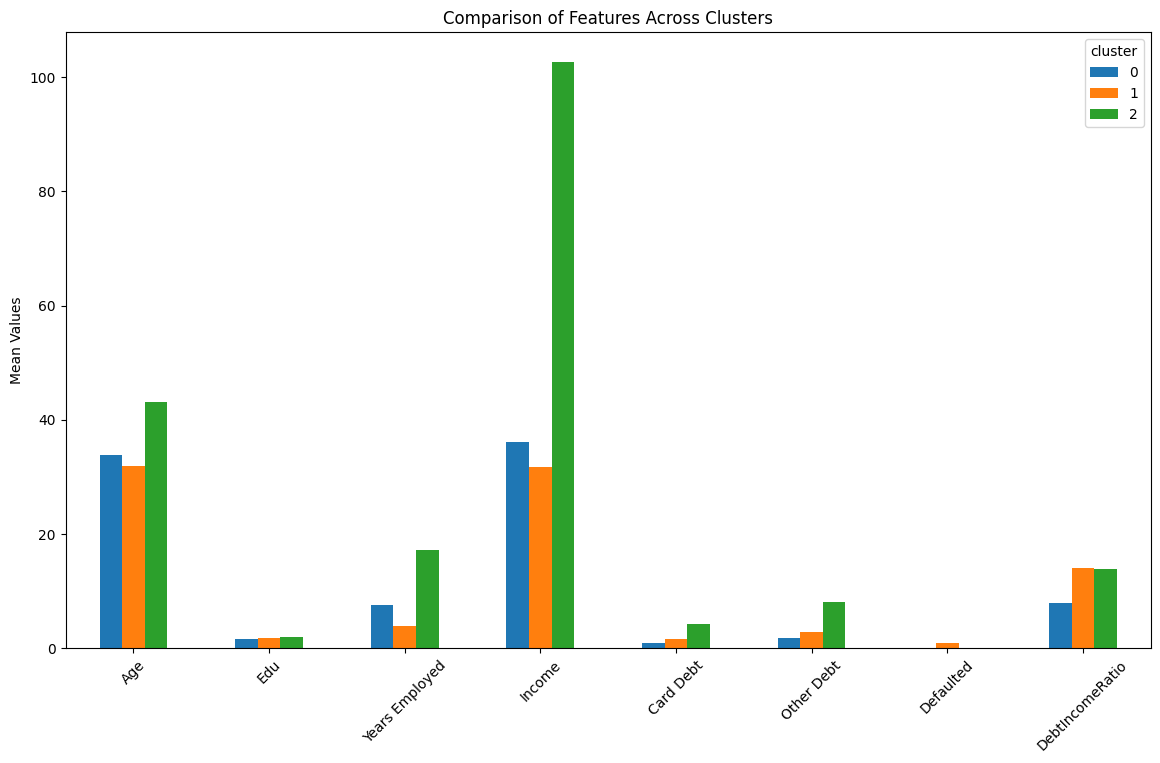

In [41]:
df2.T.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Features Across Clusters')
plt.ylabel('Mean Values')
plt.xticks(rotation=45)
plt.show()

In [38]:
df2.T

cluster,0,1,2
Age,33.827458,31.891566,43.089655
Edu,1.604824,1.861446,1.931034
Years Employed,7.654917,3.963855,17.220690
Income,36.181818,31.789157,102.724138
Card Debt,0.863681,1.576675,4.227897
Other Debt,1.822410,2.843355,8.018490
Defaulted,0.000000,0.987952,0.131034
DebtIncomeRatio,7.993506,13.994578,13.891724


In [40]:
df2

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,
0,33.827458,1.604824,7.654917,36.181818,0.863681,1.822410,0.000000,7.993506
1,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578
2,43.089655,1.931034,17.220690,102.724138,4.227897,8.018490,0.131034,13.891724
